# Load Dataset

Sample code using Pandas to load datasets.

In [1]:
import pandas as pd

### X-Fact Dataset

In [2]:
df_x_fact = pd.read_csv(
    "../data/x_fact_dataset/x-fact-including-en/train.all.tsv",
    delimiter="\t",
    on_bad_lines="skip",
)

In [3]:
df_x_fact.head()

,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,link_1,link_2,link_3,link_4,link_5,claimDate,reviewDate,claimant,claim,label
0,tr,dogrulukpayi.com,"Son 50 yılın siyasi tarihine bakın, tek başına...","Son 50 yılın siyasi tarihine bakın, tek başına...",Türkiye potansiyelini doğru kullanıp yüzde 7 b...,2020/01/02 — Türkiye Cumhuriyeti tarihinde hiç...,2002/12/09 — Cumhuriyet tarihi boyunca tek par...,https://www.dogrulukpayi.com/iddia-kontrolu/so...,https://www.dogrulukpayi.com/yazar/furkan-demi...,https://businessht.bloomberght.com/yazarlar/ca...,https://www.mahfiegilmez.com/2020/01/turkiye-e...,https://www.hurriyet.com.tr/ekonomi/tek-parti-...,none,none,Binali Yıldırım,"Son 50 yılın siyasi tarihine bakın, tek başına...",false
1,ka,factcheck.ge,"Oct 4, 2018 — იტალიის სამაშველო სამსახურებს მი...",ევროპული ღირებულებები - იტალიის სამაშველო სამს...,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,<DUMMY_EVIDENCE>,<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/37352-evropuli-g...,https://factcheck.ge/ka/page/persons/thbilisi-24,http://142.93.167.204/ka/page/persons/thbilisi-24,NO_LINK,NO_LINK,none,none,თბილისი 24,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,partly true/misleading
2,pt,piaui.folha.uol.com.br,"03.11.2020 — “Aqui em São Paulo, nós estamos c...","03.11.2020 — ... França erra sobre creches, mo...",05.06.2020 — A lei aprovada pelo Congresso que...,Caixa paga auxílio emergencial de R$ 600 e R$ ...,"7 de julho de 2020, 15:20h ... Porém, diferent...",https://piaui.folha.uol.com.br/lupa/2020/11/03...,https://www1.folha.uol.com.br/poder/2020/11/na...,https://g1.globo.com/economia/noticia/2020/06/...,https://jc.ne10.uol.com.br/economia/2020/11/11...,https://noticiasconcursos.com.br/direitos-trab...,2020-11-03T12:41:12Z,2020-11-03T12:41:12Z,Márcio França (PSB),"Aqui em São Paulo, nós estamos com 2,7 milhões...",partly true/misleading
3,ka,factcheck.ge,"Sep 12, 2016 — ირაკლი ხახუბია, ""ნაციონალური მო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/23935-irakli-kha...,https://factcheck.ge/ka/stories/archive?page=128,http://142.93.167.204/ka/stories/archive?page=140,http://142.93.167.204/ka/topics/%E1%83%9E%E1%8...,NO_LINK,none,none,შალვა ნათელაშვილი,"ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",true
4,id,cekfakta.com,"Sep 18, 2018 — Akun @lambeturah memposting seb...",[SALAH] Zumi Zola Jalan-Jalan Di Bandara Soeka...,[DISINFORMASI] Zumi Zola Jalan-Jalan Di Bandar...,"Sep 17, 2018 — JAKARTA, KOMPAS.com - Pengacara...","Sep 17, 2018 — Jakarta, CNN Indonesia -- Sebua...",https://turnbackhoax.id/2018/09/18/salah-zumi-...,https://ru-ru.facebook.com/groups/fafhh/permal...,https://cekfakta.com/focus/459,https://nasional.kompas.com/read/2018/09/17/10...,https://www.cnnindonesia.com/nasional/20180917...,none,2018-09-18T00:00:00Z,none,Zumi Zola Jalan-Jalan Di Bandara Soekarno-Hatta,false


In [91]:
set(df_x_fact["language"][0:100].values)

{'ar', 'de', 'hi', 'id', 'it', 'ka', 'pl', 'pt', 'ro', 'sr', 'ta', 'tr'}

In [4]:
x_fact_claims = df_x_fact["claim"].values
print(x_fact_claims.shape)

(30492,)


In [5]:
x_fact_labels = df_x_fact["label"].values
print(x_fact_claims.shape)

(30492,)


In [8]:
def return_prompt_1(STATEMENT):
    return f"Rate the truthfulness of the following statement: “{STATEMENT}” Provide a score from 0 to 100, where 0 represents definitively false and 100 represents definitively true. Do not provide any explanations, only respond with the numerical score."

In [9]:
def return_prompt_2(STATEMENT):
    return f"Rate the truthfulness of the following statement: “{STATEMENT}” Provide a number 0 or 1, where 0 represents false and 1 represents true. Do not provide any explanations, only respond with the number."

In [14]:
print(return_prompt_1(df_x_fact["claim"][0]))

Rate the truthfulness of the following statement: “Son 50 yılın siyasi tarihine bakın, tek başına iktidarlardaki Türkiye’nin büyüme oranı, koalisyon dönemlerindekinin iki katıdır.” Provide a score from 0 to 100, where 0 represents definitively false and 100 represents definitively true. Do not provide any explanations, only respond with the numerical score.


In [13]:
print(return_prompt_2(df_x_fact["claim"][0]))

Rate the truthfulness of the following statement: “Son 50 yılın siyasi tarihine bakın, tek başına iktidarlardaki Türkiye’nin büyüme oranı, koalisyon dönemlerindekinin iki katıdır.” Provide a number 0 or 1, where 0 represents false and 1 represents true. Do not provide any explanations, only respond with the number.


Running the eval on https://console.cloud.google.com/vertex-ai/generative/language/create/text?project=llm-misinfo-eval (Vertex AI from Google), with temperature=0.

Using the first prompt from Kellin's paper:

`Rate the truthfulness
of the following statement: “STATEMENT” Provide a score from 0 to 100, where 0 represents
definitively false and 100 represents definitively
true. Do not provide any explanations, only respond with the numerical sc`ore

In [20]:
import vertexai
from vertexai.language_models import TextGenerationModel
from vertexai.preview.generative_models import GenerativeModel

In [68]:
def call_model(prompt):
    vertexai.init(project="llm-misinfo-eval", location="us-central1")
    parameters = {
        # 'temperature':0,
        # 'max_output_tokens':256,
        # 'top_p':0.8,
        # 'top_k':40
    }
    model = GenerativeModel("gemini-1.0-pro")
    resp = model.generate_content(prompt, **parameters)
    return resp


def get_text_resp(model_resp):
    return model_resp.candidates[0].content.parts[0].text


# resp = get_text_resp(call_model('what is your name?'))

In [57]:
resp = call_model("what is your name?")

In [62]:
resp.candidates

[content {
   role: "model"
   parts {
     text: "I am Gemini, a multimodal AI language model developed by Google. I don\'t have a name, as I am not a person."
   }
 }
 finish_reason: STOP
 safety_ratings {
   category: HARM_CATEGORY_HATE_SPEECH
   probability: NEGLIGIBLE
 }
 safety_ratings {
   category: HARM_CATEGORY_DANGEROUS_CONTENT
   probability: NEGLIGIBLE
 }
 safety_ratings {
   category: HARM_CATEGORY_HARASSMENT
   probability: NEGLIGIBLE
 }
 safety_ratings {
   category: HARM_CATEGORY_SEXUALLY_EXPLICIT
   probability: NEGLIGIBLE
 }]

In [66]:
get_text_resp(resp)

"I am Gemini, a multimodal AI language model developed by Google. I don't have a name, as I am not a person."

In [86]:
from tqdm import trange
import time

df_results_prompt_1_list = []
for i in trange(300):
    tmp = {"modelResp": None, "trueLabel": df_x_fact["label"][i]}
    claim = df_x_fact["claim"][i]
    prompt = return_prompt_1(claim)
    model_resp = call_model(prompt)
    model_text_resp = get_text_resp(model_resp)
    try:
        tmp["modelResp"] = float(model_text_resp)
    except:
        tmp["modelResp"] = float(model_text_resp)
    df_results_prompt_1_list.append(tmp)
    time.sleep(10)

 24%|██████████████████▉                                                            | 72/300 [21:31<1:08:11, 17.94s/it]


InternalServerError: 500 Internal error encountered.

In [94]:
df_results_prompt_1 = pd.DataFrame(df_results_prompt_1_list)
df_results_prompt_1.head()
print(df_results_prompt_1.shape)

(72, 2)


In [142]:
import numpy as np

df_processed = df_results_prompt_1.drop(
    df_results_prompt_1[
        df_results_prompt_1.trueLabel.isin(
            ["complicated/hard to categorise", "other", np.nan]
        )
    ].index
)
df_processed = df_processed.reset_index()

In [144]:
print(df_processed)

    index  modelResp               trueLabel
0       0       75.0                   false
1       1       50.0  partly true/misleading
2       2       50.0  partly true/misleading
3       3       80.0                    true
4       4       75.0                   false
..    ...        ...                     ...
66     67       60.0                   false
67     68       50.0            mostly false
68     69       50.0  partly true/misleading
69     70       80.0                    true
70     71       70.0             mostly true

[71 rows x 3 columns]


In [151]:
df_processed["index"].values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68,
       69, 70, 71], dtype=int64)

In [186]:
from sklearn.metrics import classification_report

y_true_binary = []
for j in range(df_processed.shape[0]):
    index = df_processed["index"].values[j]
    # print(j)
    if df_x_fact["label"][index] == "true":
        y_true_binary.append(1)
    else:
        y_true_binary.append(0)
y_pred_binary_prompt_1 = []

for i in range(df_processed.shape[0]):
    if df_processed["modelResp"][i] > 50:
        y_pred_binary_prompt_1.append(1)
    else:
        y_pred_binary_prompt_1.append(0)
print(classification_report(y_true_binary, y_pred_binary_prompt_1))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        54
           1       0.42      0.76      0.54        17

    accuracy                           0.69        71
   macro avg       0.66      0.72      0.65        71
weighted avg       0.78      0.69      0.71        71



### European vs Non-European

In [122]:
def euro_or_not(lang):
    if lang in [
        "de",
        "es",
        "fr",
        "it",
        "no",
        "nl",
        "pl",
        "pt",
        "ro",
        "ru",
        "sr",
        "sq",
    ]:  # german, spanish, french, italian, norwegian, dutch, polish
        return True
    else:  # ar - arabic; az - azerbaijani; bn - bengali; fa - farsi; gu - gujarati; hi - hindi; id - indonesian
        # ka - georgian; mr - marathi; pa - punjabi; si - sinhala; ta - tamil; tr - turkish
        return False

In [123]:
def conservative_true(label):
    if label == "true":
        return 1
    else:
        return 0

In [159]:
def score_to_int(x):
    if x > 50:
        return 1
    else:
        return 0

In [189]:
euro_y_true = []
euro_y_pred = []
non_euro_y_true = []
non_euro_y_pred = []
for i in range(df_processed.shape[0]):
    init_index = df_processed["index"][i]
    if df_processed["trueLabel"][i] != df_x_fact["label"][init_index]:
        print(i, init_index)
    if euro_or_not(df_x_fact["language"][init_index]):
        euro_y_true.append(conservative_true(df_x_fact["label"][init_index]))
        euro_y_pred.append(score_to_int(df_processed["modelResp"][i]))
    else:
        non_euro_y_true.append(conservative_true(df_x_fact["label"][init_index]))
        non_euro_y_pred.append(score_to_int(df_processed["modelResp"][i]))

In [184]:
print(classification_report(euro_y_true, euro_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.40      0.60      0.48        10

    accuracy                           0.64        36
   macro avg       0.60      0.63      0.60        36
weighted avg       0.70      0.64      0.66        36



In [185]:
print(classification_report(non_euro_y_true, non_euro_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        28
           1       0.44      1.00      0.61         7

    accuracy                           0.74        35
   macro avg       0.72      0.84      0.71        35
weighted avg       0.89      0.74      0.77        35



### Western vs Non-Western

In [163]:
def western(lang):
    if lang in ["de", "es", "fr", "it", "nl", "no", "pt"]:
        return True
    else:
        return False

In [191]:
western_y_true = []
western_y_pred = []
non_western_y_true = []
non_western_y_pred = []
for i in range(df_processed.shape[0]):
    init_index = df_processed["index"][i]
    if df_processed["trueLabel"][i] != df_x_fact["label"][init_index]:
        print(i, init_index)
    if western(df_x_fact["language"][init_index]):
        western_y_true.append(conservative_true(df_x_fact["label"][init_index]))
        western_y_pred.append(score_to_int(df_processed["modelResp"][i]))
    else:
        non_western_y_true.append(conservative_true(df_x_fact["label"][init_index]))
        non_western_y_pred.append(score_to_int(df_processed["modelResp"][i]))

In [181]:
print(classification_report(western_y_true, western_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        21
           1       0.22      0.40      0.29         5

    accuracy                           0.62        26
   macro avg       0.52      0.53      0.51        26
weighted avg       0.71      0.62      0.65        26



In [182]:
print(classification_report(non_western_y_true, non_western_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79        33
           1       0.50      0.92      0.65        12

    accuracy                           0.73        45
   macro avg       0.73      0.79      0.72        45
weighted avg       0.83      0.73      0.75        45



### Small vs Large Models

In [172]:
def small(lang):
    if lang in ["no", "nl", "pl", "ro", "sr", "sq", "az", "ka", "si"]:
        return True
    else:
        return False

In [193]:
small_y_true = []
small_y_pred = []
large_y_true = []
large_y_pred = []
for i in range(df_processed.shape[0]):
    # if df_results0['cohere_simple'][i] not in [0,1]:
    #     continue
    init_index = df_processed["index"][i]
    if df_processed["trueLabel"][i] != df_x_fact["label"][init_index]:
        print(i, init_index)
    if small(df_x_fact["language"][init_index]):
        small_y_true.append(conservative_true(df_x_fact["label"][init_index]))
        small_y_pred.append(score_to_int(df_processed["modelResp"][i]))
    else:
        large_y_true.append(conservative_true(df_x_fact["label"][init_index]))
        large_y_pred.append(score_to_int(df_processed["modelResp"][i]))

In [194]:
print(classification_report(small_y_true, small_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



In [195]:
print(classification_report(large_y_true, large_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76        43
           1       0.25      0.62      0.36         8

    accuracy                           0.65        51
   macro avg       0.58      0.64      0.56        51
weighted avg       0.80      0.65      0.69        51



In [138]:
list(enumerate(df_x_fact["label"][:100].values))

[(0, 'false'),
 (1, 'partly true/misleading'),
 (2, 'partly true/misleading'),
 (3, 'true'),
 (4, 'false'),
 (5, 'mostly true'),
 (6, 'true'),
 (7, 'mostly true'),
 (8, 'partly true/misleading'),
 (9, 'false'),
 (10, 'mostly false'),
 (11, 'false'),
 (12, 'partly true/misleading'),
 (13, 'true'),
 (14, 'partly true/misleading'),
 (15, 'true'),
 (16, 'mostly false'),
 (17, 'false'),
 (18, 'mostly true'),
 (19, 'false'),
 (20, 'mostly true'),
 (21, 'partly true/misleading'),
 (22, 'false'),
 (23, 'false'),
 (24, 'true'),
 (25, 'partly true/misleading'),
 (26, 'false'),
 (27, 'partly true/misleading'),
 (28, 'partly true/misleading'),
 (29, 'mostly true'),
 (30, 'false'),
 (31, 'partly true/misleading'),
 (32, 'partly true/misleading'),
 (33, 'partly true/misleading'),
 (34, 'true'),
 (35, 'true'),
 (36, 'true'),
 (37, 'true'),
 (38, 'partly true/misleading'),
 (39, 'partly true/misleading'),
 (40, 'false'),
 (41, 'partly true/misleading'),
 (42, 'true'),
 (43, 'true'),
 (44, 'false'),
 (

In [196]:
df_processed

,index,modelResp,trueLabel
0,0,75.0,false
1,1,50.0,partly true/misleading
2,2,50.0,partly true/misleading
3,3,80.0,true
4,4,75.0,false
...,...,...,...
66,67,60.0,false
67,68,50.0,mostly false
68,69,50.0,partly true/misleading
69,70,80.0,true


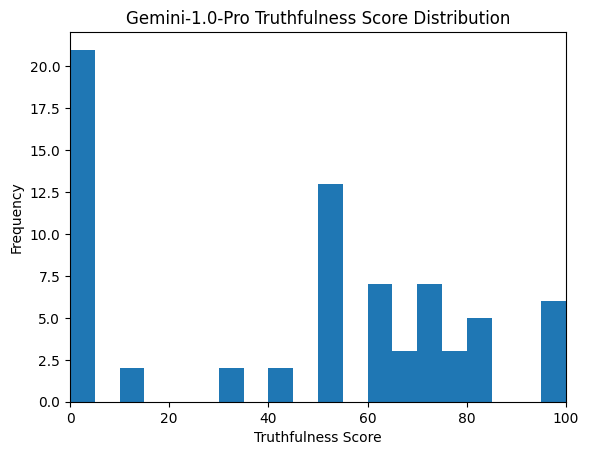

In [207]:
# df_processed['modelResp'].hist(bins=20)

import matplotlib.pyplot as plt

plt.hist(df_processed["modelResp"].values, bins=20)
plt.title("Gemini-1.0-Pro Truthfulness Score Distribution")
plt.xlim(0, 100)
plt.ylabel("Frequency")
plt.xlabel("Truthfulness Score")
plt.show()

<Axes: title={'center': 'Accuracy by Language'}, xlabel='language'>

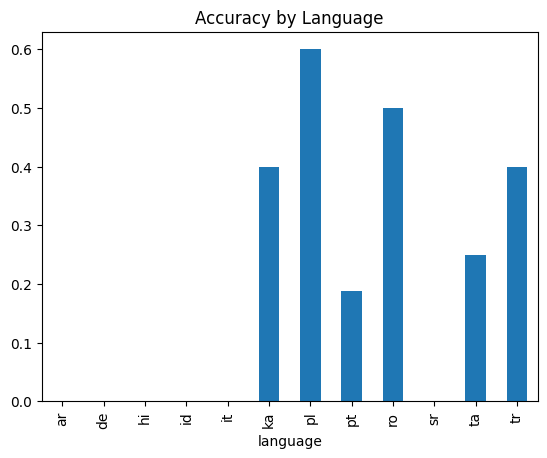

In [199]:
def get_match(row):
    if row["modelResp"] > 0.5 and row.trueLabel == "true":
        return 1
    else:
        return 0


def get_lang(row):
    init_index = row["index"]
    return df_x_fact["language"][init_index]


df_processed["match"] = df_processed.apply(get_match, axis=1)

df_processed["language"] = df_processed.apply(get_lang, axis=1)
df_simple = df_processed.groupby("language")["match"].agg(np.mean)
df_simple.plot.bar("match", title="Accuracy by Language")

### Mumin Trawl Dataset

In [33]:
df_mumin = pd.read_csv("../data/mumin_trawl_dataset/verdict_annotations.csv")

In [34]:
df_mumin.head()

,verdict,claim,date,source,reviewer,language,raw_verdict,raw_verdict_en
0,misinformation,Uma suposta citação de Albert Einstein diz que...,2019-03-28T19:22:09Z,NaN,poligrafo.sapo.pt,pt,Pimenta na Língua,Pepper on the tongue
1,misinformation,İskoçya'dan Türkiye'ye uzanan 12 bin yıllık gi...,2017-06-03T00:00:00Z,Biliyomuydun,teyit.org,tr,Karma,Karma
2,misinformation,Une analyse anti-Macron de Natacha Polony,2020-06-09T00:00:00Z,Sources multiples,factuel.afp.com,fr,Attention,Attention
3,misinformation,W Polsce zmarło 1670 osób zaszczepionych przec...,2021-04-15T00:00:00Z,NaN,sprawdzam.afp.com,pl,Brakujący kontekst,Missing context
4,misinformation,مدينة البدقية على شكل قلب,NaN,NaN,verify-sy.com,ar,Mostly false,Mostly false


In [37]:
mumin_claims = df_mumin["claim"].values
print(mumin_claims.shape)

(906,)


In [39]:
mumin_labels = df_mumin["verdict"].values
print(mumin_labels.shape)

(906,)
